In [2]:
import os
import gdown

# --- Configuration ---
# The Google Drive link to your file
url = 'https://drive.google.com/uc?id=1vBE48dpWDXARqMRxtzdqwJw1wVkSa8yz'

# Define the folder and filename for the output
output_folder = 'data'
file_name = 'hummus_recipes.csv'
destination_path = os.path.join(output_folder, file_name)

# 1. Check if the output folder exists, create it if it doesn't
if not os.path.exists(output_folder):
    print(f"Directory '{output_folder}' not found. Creating it.")
    os.makedirs(output_folder)
else:
    print(f"Directory '{output_folder}' already exists.")

# 2. Check if the file already exists, download it if it doesn't
if not os.path.exists(destination_path):
    print(f"File '{file_name}' not found. Starting download...")
    # Use gdown to download the file from the URL to the destination path
    gdown.download(url, destination_path, quiet=False)
    print(f"✅ Download complete! File saved to '{destination_path}'")
else:
    print(f"File '{file_name}' already exists in '{output_folder}'. Skipping download.")

Directory 'data' already exists.
File 'hummus_recipes.csv' already exists in 'data'. Skipping download.


In [3]:
# Do some basic cleaning and organization on the dataset first. 
%run basic_cleaning.py

=== Loading raw dataset ===
Initial shape: (507335, 37)
Renamed first unnamed column → 'row_number'
Dropped 2979 rows with '**' normalization issues
Shape after normalization filter: (504356, 37)
Converted all column names to snake_case
Converted numeric columns safely (invalid values → NaN)
Removed 55048 rows with absurd numeric values
Shape after numeric filtering: (449308, 37)

✅ Basic cleaning complete.
Cleaned dataset saved → data/hummus_recipes_cleaned_basic.csv
Final shape: (449308, 37)


In [4]:
import pandas as pd
# Load the dataset
file_path = 'data/hummus_recipes_cleaned_basic.csv'
df = pd.read_csv(file_path, low_memory = False)

print("✅ Dataset loaded successfully!")

# Display the first 5 rows to see the columns and sample data
print("First 5 rows of the dataset:")
display(df.head())

# Get a concise summary of the dataframe (column types, non-null counts)
print("\nDataset Info:")
df.info()

# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())

✅ Dataset loaded successfully!
First 5 rows of the dataset:


,row_number,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,...,sugars_g,protein_g,direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,...,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,...,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,...,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
3,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,...,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."
4,5,289882,"Crab Salad With Asparagus, Avocado, and Lime V...",Tom Douglas,37779,45.0,['Make the vinaigrette: whisk together the lim...,"{'Lime Vinaigrette': [('fresh lime juice', '3 ...",4,2008-03-04,...,9.5,21.9,12,14,0.246449,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['asparagus', 'avocados', 'bibb lettuce', 'cra..."



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449308 entries, 0 to 449307
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   row_number                449308 non-null  int64  
 1   recipe_id                 449308 non-null  int64  
 2   title                     449308 non-null  object 
 3   description               440877 non-null  object 
 4   author_id                 449308 non-null  int64  
 5   duration                  444038 non-null  float64
 6   directions                449308 non-null  object 
 7   ingredients               449306 non-null  object 
 8   serves                    402675 non-null  object 
 9   last_changed_date         449308 non-null  object 
 10  food_kg_locator           449308 non-null  object 
 11  recipe_url                449308 non-null  object 
 12  tags                      205214 non-null  object 
 13  new_recipe_id             449

,row_number,recipe_id,author_id,duration,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsperrecipe,servingsize_g,...,sodium_mg,totalcarbohydrate_g,dietaryfiber_g,sugars_g,protein_g,direction_size,ingredients_sizes,who_score,fsa_score,nutri_score
count,449308.000000,449308.000000,4.493080e+05,444038.000000,449308.000000,449308.000000,449308.000000,449308.000000,449308.000000,449308.000000,...,449308.000000,449308.000000,449308.000000,449308.000000,449308.000000,449308.000000,449308.000000,448181.000000,438733.000000,449308.000000
mean,253607.158206,266023.366811,1.888946e+07,62.250857,253607.158206,51793.090408,2.432780,2.862246,7.365320,299.955828,...,462.194886,32.081070,3.029090,12.582918,13.085661,6.433792,9.225934,0.222244,0.482363,0.263098
std,146452.951306,150091.282251,1.852614e+08,91.621093,146452.951306,93405.748484,2.326655,15.675768,70.987886,532.379148,...,486.478403,27.170042,3.570568,18.400195,13.076164,4.061379,3.929914,0.061090,0.276335,0.242982
min,0.000000,38.000000,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,126763.750000,137206.750000,6.947400e+04,20.000000,126763.750000,1099.000000,0.000000,0.000000,4.000000,111.000000,...,107.200000,11.900000,0.800000,2.300000,3.100000,4.000000,6.000000,0.189562,0.250000,0.000000
50%,253591.500000,266911.500000,2.348505e+05,40.000000,253591.500000,5159.000000,3.500000,1.000000,6.000000,197.000000,...,303.800000,25.800000,2.000000,5.900000,7.700000,6.000000,9.000000,0.223107,0.500000,0.250000
75%,380382.250000,395097.250000,5.356330e+05,65.000000,380382.250000,39948.000000,5.000000,2.000000,8.000000,326.000000,...,657.200000,44.900000,4.000000,15.300000,20.600000,8.000000,11.000000,0.265894,0.750000,0.500000
max,507334.000000,538222.000000,2.001112e+09,1410.000000,507334.000000,302411.000000,5.000000,3081.000000,32767.000000,161602.000000,...,2999.600000,257.700000,76.600000,232.800000,60.000000,107.000000,45.000000,0.494434,1.000000,1.000000


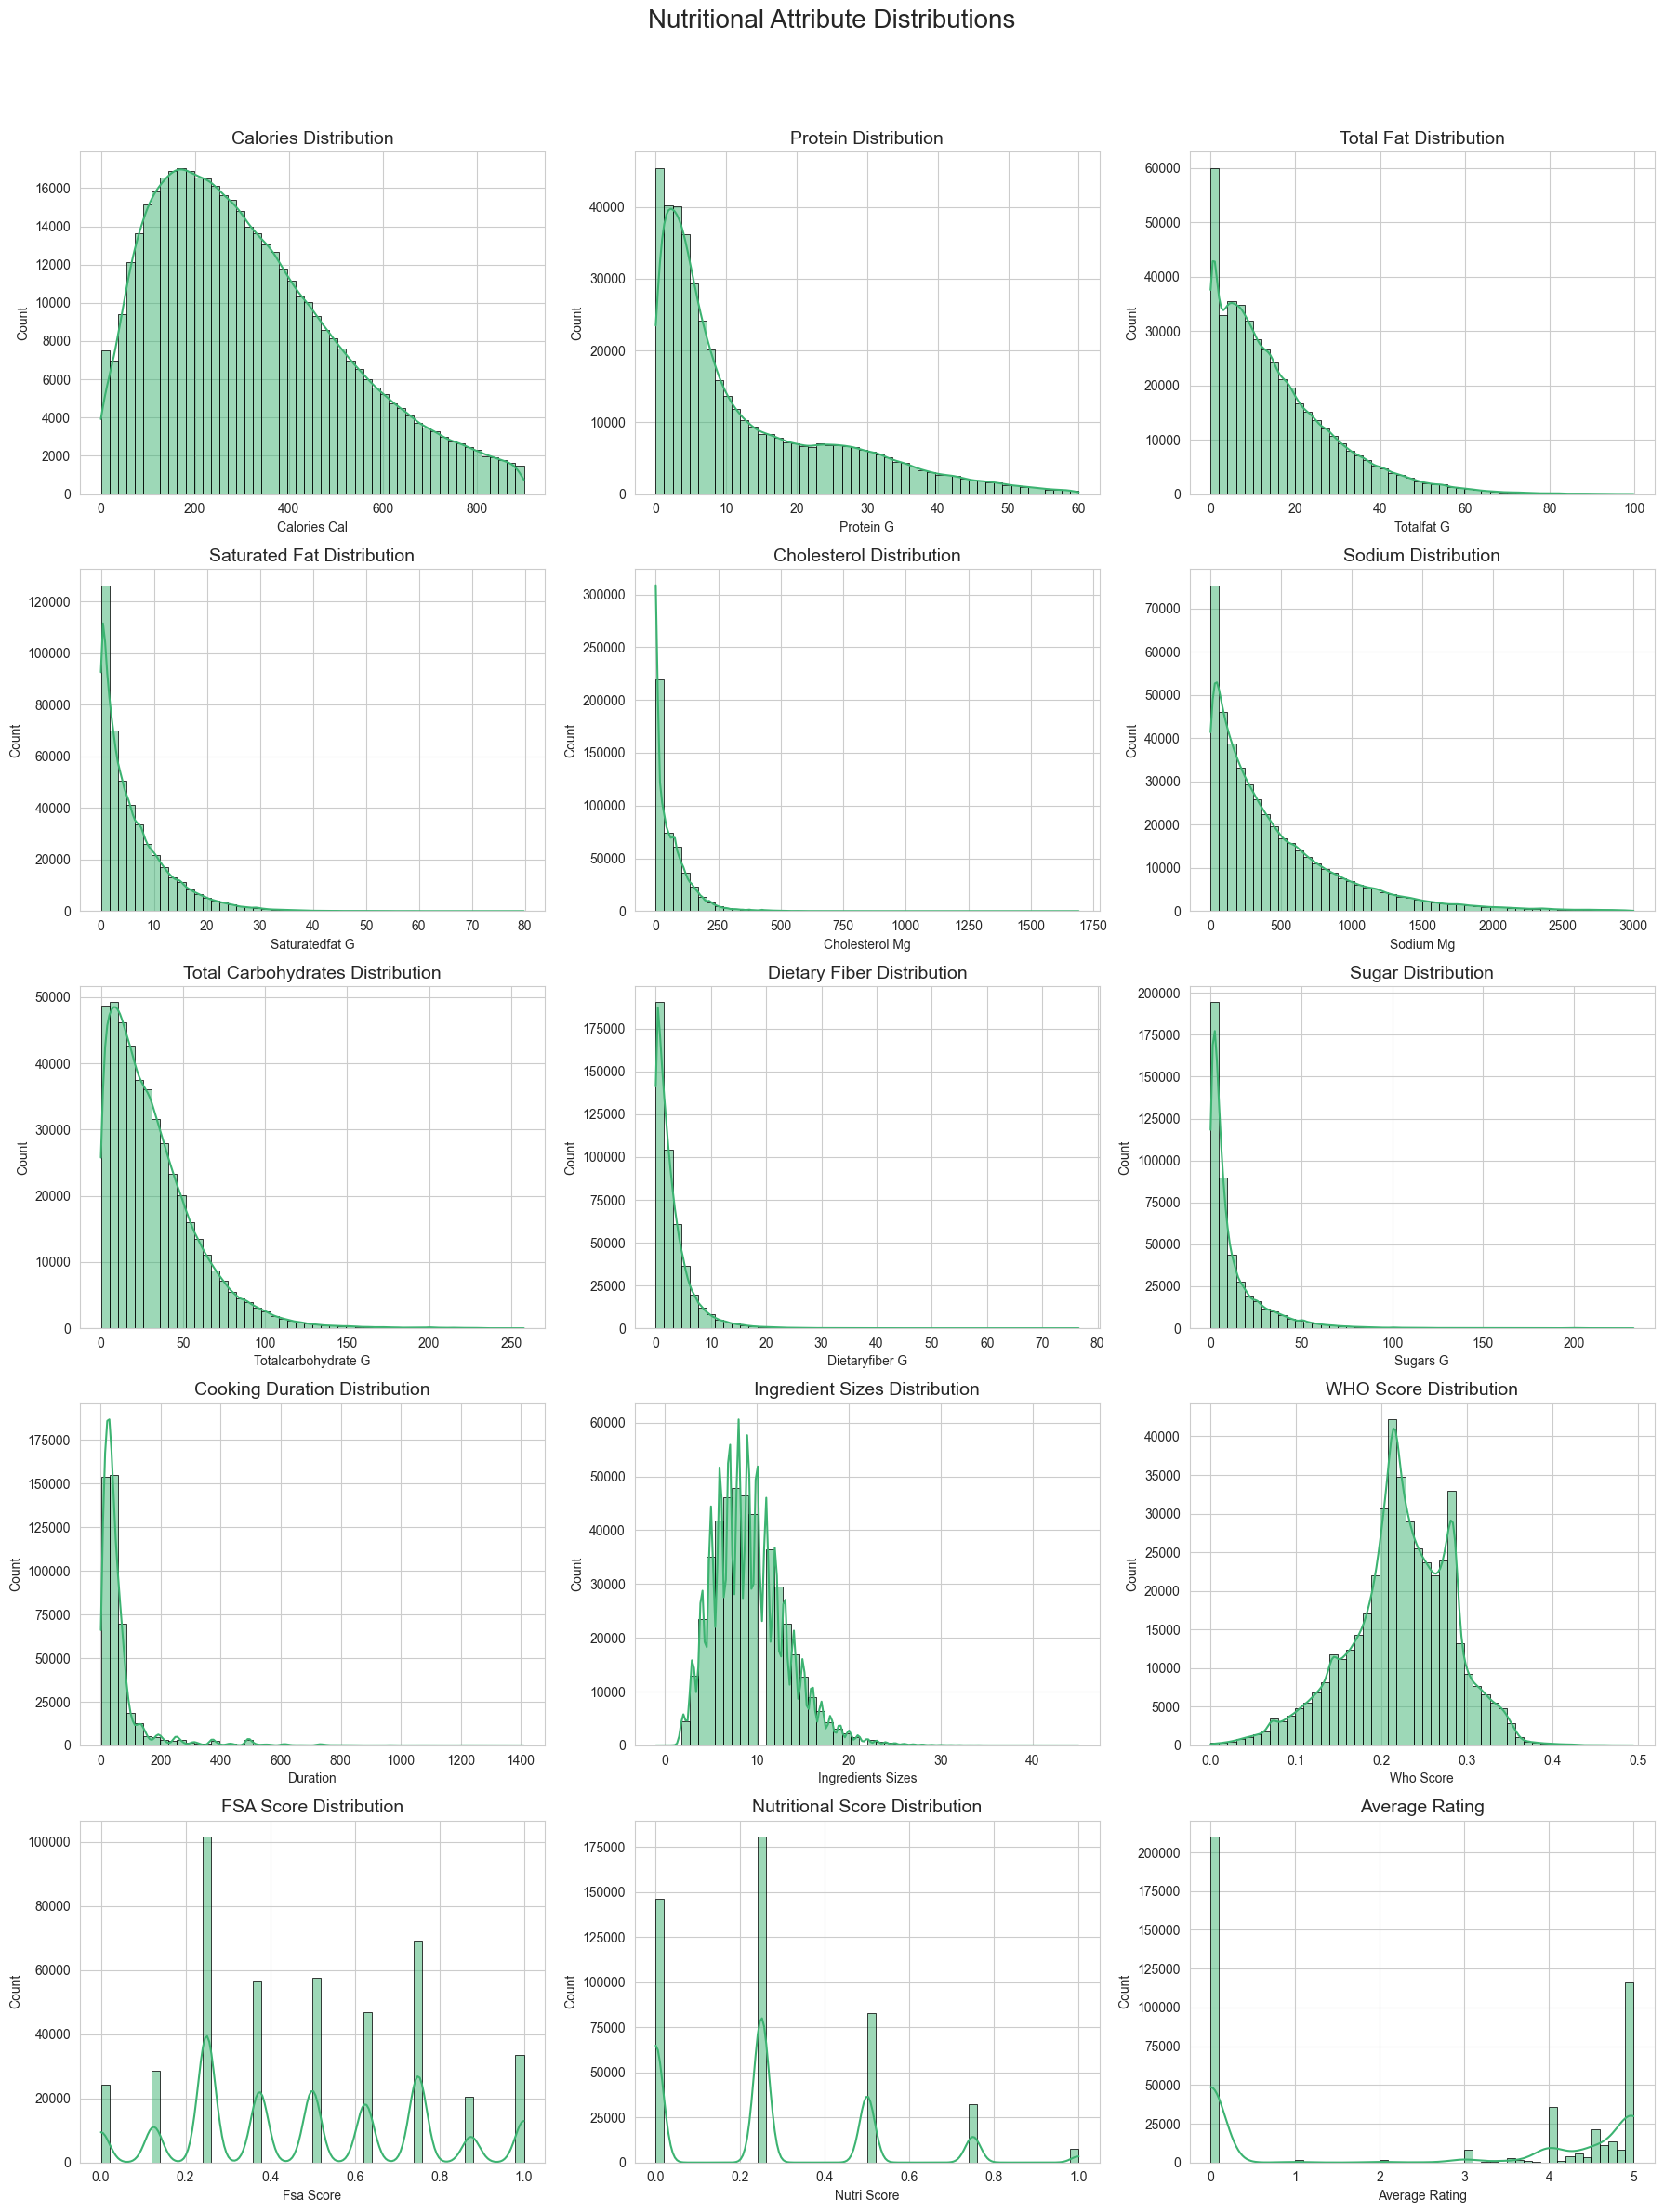

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Setup
# ---------------------------------------------
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)

# ---------------------------------------------
# Define columns to explore
# ---------------------------------------------
nutritional_cols = [
    'calories_cal',
    'protein_g',
    'totalfat_g',
    'saturatedfat_g',
    'cholesterol_mg',
    'sodium_mg',
    'totalcarbohydrate_g',
    'dietaryfiber_g',
    'sugars_g', 
    'duration', 
    'ingredients_sizes',
    'who_score',
    'fsa_score',
    'nutri_score',
    'average_rating' 
    
]

# Nicely formatted titles for plots
titles = {
    'calories_cal': 'Calories Distribution',
    'protein_g': 'Protein Distribution',
    'totalfat_g': 'Total Fat Distribution',
    'saturatedfat_g': 'Saturated Fat Distribution',
    'cholesterol_mg': 'Cholesterol Distribution',
    'sodium_mg': 'Sodium Distribution',
    'totalcarbohydrate_g': 'Total Carbohydrates Distribution',
    'dietaryfiber_g': 'Dietary Fiber Distribution',
    'sugars_g': 'Sugar Distribution', 
    'duration': 'Cooking Duration Distribution', 
    'ingredients_sizes': 'Ingredient Sizes Distribution',
    'who_score': 'WHO Score Distribution',
    'fsa_score': 'FSA Score Distribution',
    'nutri_score': 'Nutritional Score Distribution',
    'average_rating': 'Average Rating'
}

# ---------------------------------------------
# Plot all nutritional distributions in a grid
# ---------------------------------------------
n = len(nutritional_cols)
rows = (n + 2) // 3  # roughly 3 per row

fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(nutritional_cols):
    if col in df.columns:
        sns.histplot(df[col], bins=50, ax=axes[i], color='mediumseagreen', edgecolor='black', kde=True)
        axes[i].set_title(titles[col], fontsize=14)
        axes[i].set_xlabel(col.replace('_', ' ').title())
    else:
        axes[i].set_visible(False)

# Hide any empty subplots if the number of columns < grid size
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Nutritional Attribute Distributions', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


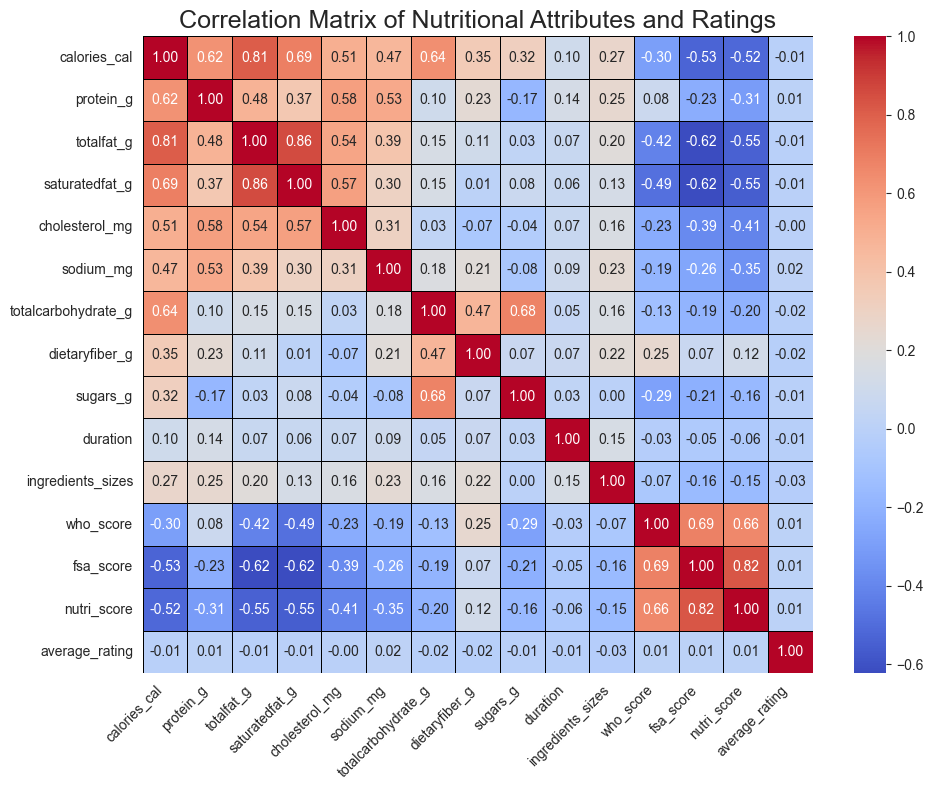

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with cleaned column names

# ---------------------------------------------
# Define columns for correlation analysis
# ---------------------------------------------
nutritional_cols = [
    'calories_cal',
    'protein_g',
    'totalfat_g',
    'saturatedfat_g',
    'cholesterol_mg',
    'sodium_mg',
    'totalcarbohydrate_g',
    'dietaryfiber_g',
    'sugars_g',
    'duration',
    'ingredients_sizes',
    'who_score',
    'fsa_score',
    'nutri_score',
    'average_rating' 
]

# ---------------------------------------------
# Calculate and Plot Correlation Matrix
# ---------------------------------------------

# Select only the specified columns from the DataFrame
corr_df = df[nutritional_cols]

# Calculate the correlation matrix
corr_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,     
    cmap='coolwarm',
    fmt='.2f',      
    linewidths=.5,  
    linecolor='black' 
)
plt.title('Correlation Matrix of Nutritional Attributes and Ratings', fontsize=18)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


C:\Users\usama\AppData\Local\Temp\ipykernel_7884\4085116108.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


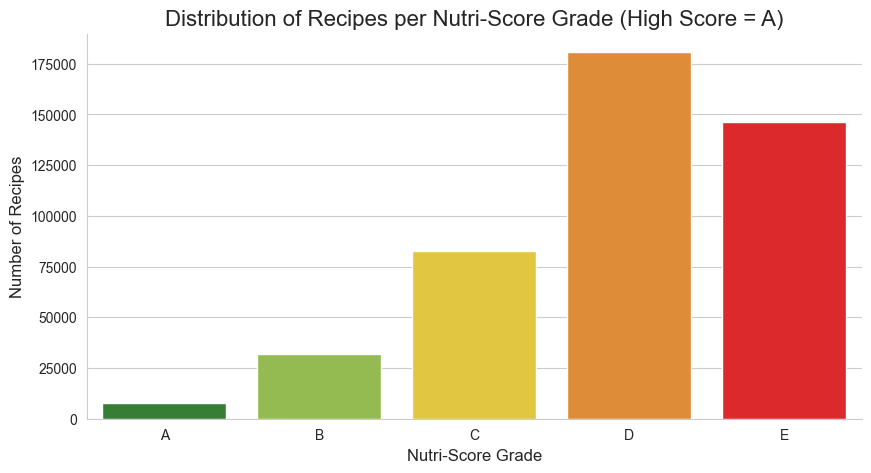

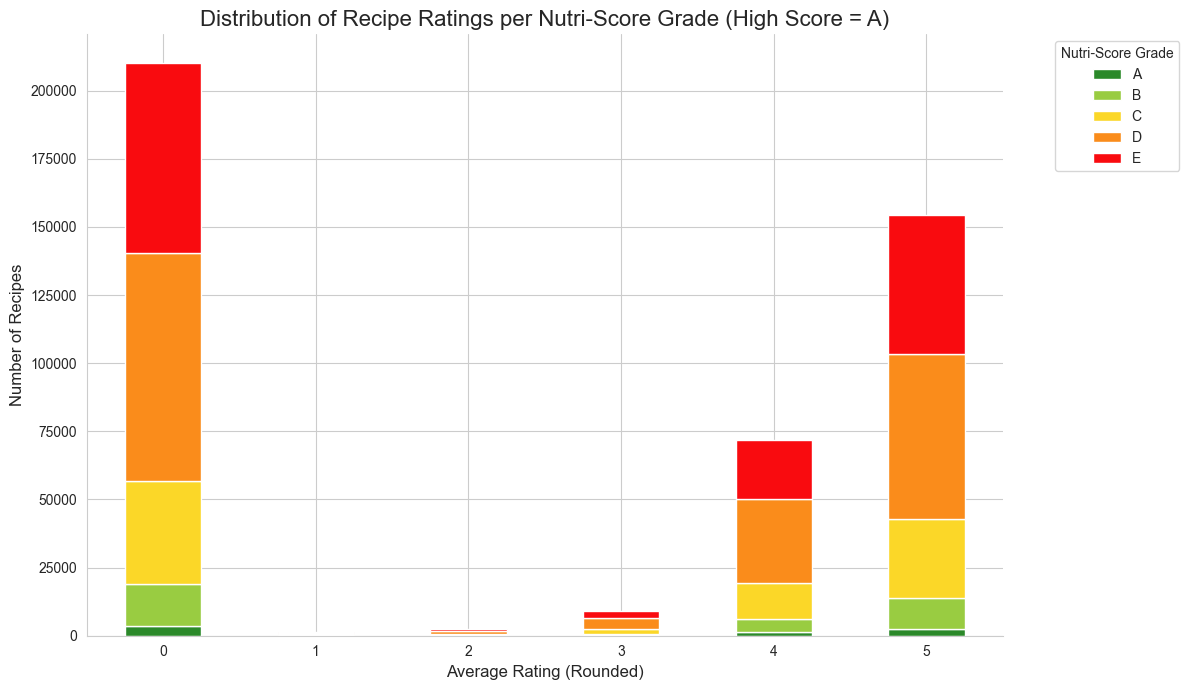

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- Step 1: Map nutri_score (0-1 scale) to Letter Grades A-E (High Score = A) ---
bin_edges = [-0.01, 0.2, 0.4, 0.6, 0.8, 1.0]
# Labels assigned such that E is for the lowest scores, A is for the highest
grade_labels = ['E', 'D', 'C', 'B', 'A']
plot_order_grades = ['A', 'B', 'C', 'D', 'E'] # Standard display order

# Define the specific colors
grade_colors = {
    'A': '#2b892a',  # Dark Green
    'B': '#99cc41',  # Light Green
    'C': '#fbd728',  # Yellow/Gold
    'D': '#fa8c1b',  # Orange
    'E': '#f90b0f'   # Red
}
palette_colors_ordered = [grade_colors[grade] for grade in plot_order_grades]

# Create the grade column using pd.cut
df['nutri_score_grade'] = pd.cut(df['nutri_score'],
                                 bins=bin_edges,
                                 labels=grade_labels,
                                 right=True,
                                 include_lowest=True)

# --- Step 2: Plot Distribution of Nutri-Score Grades (Recipe Counts per Grade) ---
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='nutri_score_grade',
    order=plot_order_grades,      # Plot bars in A, B, C, D, E order
    palette=palette_colors_ordered, # Use the defined colors
    legend=False                  # Hide the redundant legend
    )
plt.title('Distribution of Recipes per Nutri-Score Grade (High Score = A)', fontsize=16)
plt.xlabel('Nutri-Score Grade', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)
sns.despine()
plt.show()
# 

# --- Step 3: Prepare Rating Data ---
df['avg_rating_int'] = df['average_rating'].round().astype(int)

# --- Step 4: Plot Stacked Bar Chart (Ratings vs. Grades) ---
# Group, count, unstack, reorder, and fill missing values
rating_nutri_counts = df.groupby(['avg_rating_int', 'nutri_score_grade'], observed=False) \
                        .size().unstack(fill_value=0) \
                        .reindex(columns=plot_order_grades, fill_value=0) # Order columns A-E

# Create list of colors corresponding to the ordered columns (A-E)
stacked_bar_colors = [grade_colors[grade] for grade in plot_order_grades]

# Create the stacked bar plot
ax = rating_nutri_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=stacked_bar_colors)

plt.title('Distribution of Recipe Ratings per Nutri-Score Grade (High Score = A)', fontsize=16)
plt.xlabel('Average Rating (Rounded)', fontsize=12)
plt.ylabel('Number of Recipes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Nutri-Score Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()
#

In [9]:
# Perform text preprocessing
%run text_preprocessing.py 

=== Loading cleaned dataset ===


D:\Oulu MSc\Autumn 2025\Natural Language Processing and Text Mining\Project\recipe-rag-nlp\text_preprocessing.py:59: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


Initial dataset shape: (449308, 37)
Text columns detected: ['title', 'ingredients', 'directions', 'tags']

=== Starting text preprocessing ===
 → Processing column: title
 → Processing column: ingredients
 → Processing column: directions
 → Processing column: tags

=== SUMMARY REPORT ===
New columns added: ['num_ingredient_tokens', 'num_tag_tokens', 'processed_directions', 'processed_ingredients', 'processed_tags', 'processed_title']
Average ingredient tokens: 41.73
Average tag tokens: 12.67
Final dataset shape: (449308, 43)

✅ Text preprocessing complete.
Saved processed dataset → data/hummus_recipes_preprocessed.csv
